# IMPORT LIBRARIES 

In [1]:
# Import packages

import missingno as msno 
import pandas as pd #Pandas is a powerful data manipulation , It provides data structures like DataFrames 
import numpy as np #library for numerical operations, support for large, multi-dimensional arrays and matrices, along with mathematical functions.
import seaborn as sns #Seaborn is a statistical data visualization library based on Matplotlib
 


# Importing Matplotlibs
import matplotlib.pyplot as plt #create various types of plots
import matplotlib.mlab as mlab 
import matplotlib #imports the entire Matplotlib library
plt.style.use('ggplot') #provide a visuals
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #size for Matplotlib plots to (12, 8), influencing the dimensions of created figures.


# EXPLORATORY DATA ANALYSIS ( EDA)

In [2]:
#Load Dataset
#data set is loaded here in form of csv and 10 line items are created within head
df = pd.read_csv('./tiktok_dataset.csv')
df.head(10)

# claim_status    video_id  video_duration_sec  \
0   1        claim  7017666017                  59   
1   2        claim  4014381136                  32   
2   3        claim  9859838091                  31   
3   4        claim  1866847991                  25   
4   5        claim  7105231098                  19   
5   6        claim  8972200955                  35   
6   7        claim  4958886992                  16   
7   8        claim  2270982263                  41   
8   9        claim  5235769692                  50   
9  10        claim  4660861094                  45   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   
5  someone shared with me that gross domestic pro...    not verified   
6  someone shared with me that elvis presley has ...    not verified   
7  someone shared with me that the best selling s...    not verified   
8  someone shared with me that about half of the ...    not verified   
9  someone shared with me that it would take a 50...        verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   
5      under review          336647.0          175546.0            62303.0   
6            active          750345.0          486192.0           193911.0   
7            active          547532.0            1072.0               50.0   
8            active           24819.0           10160.0             1050.0   
9            active          931587.0          171051.0            67739.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0  
5                4293.0               1857.0  
6                8616.0               5446.0  
7                  22.0                 11.0  
8                  53.0                 27.0  
9                4104.0               2540.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


# KEY STATISTICS

In [4]:
#Show Key Statistics
#it helps calculate mean , median , mode , min , max 
df.describe()

#      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000              0.000000   
25%          810.750000         115.000000              7.000000   
50%         3403.500000         717.000000             46.000000   
75%       125020.000000       18222.000000           1156.250000   
max       657830.000000      256130.000000          14994.000000   

       video_comment_count  
count         19084.000000  
mean            349.312146  
std             799.638865  
min               0.000000  
25%               1.000000  
50%               9.000000  
75%             292.000000  
max            9599.000000

In [5]:
df.shape

(19382, 12)

In [6]:
# Check the columns in the DataFrame
#To know what are the columsn we have in the dataset
columns_list = df.columns
columns_list

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

# CHECK FOR MISSING DATA AND DROPING THEM

In [7]:
# Check in for missing data 
# Using loop to check the missing data 


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# - 0%
claim_status - 2%
video_id - 0%
video_duration_sec - 0%
video_transcription_text - 2%
verified_status - 0%
author_ban_status - 0%
video_view_count - 2%
video_like_count - 2%
video_share_count - 2%
video_download_count - 2%
video_comment_count - 2%


<Axes: >

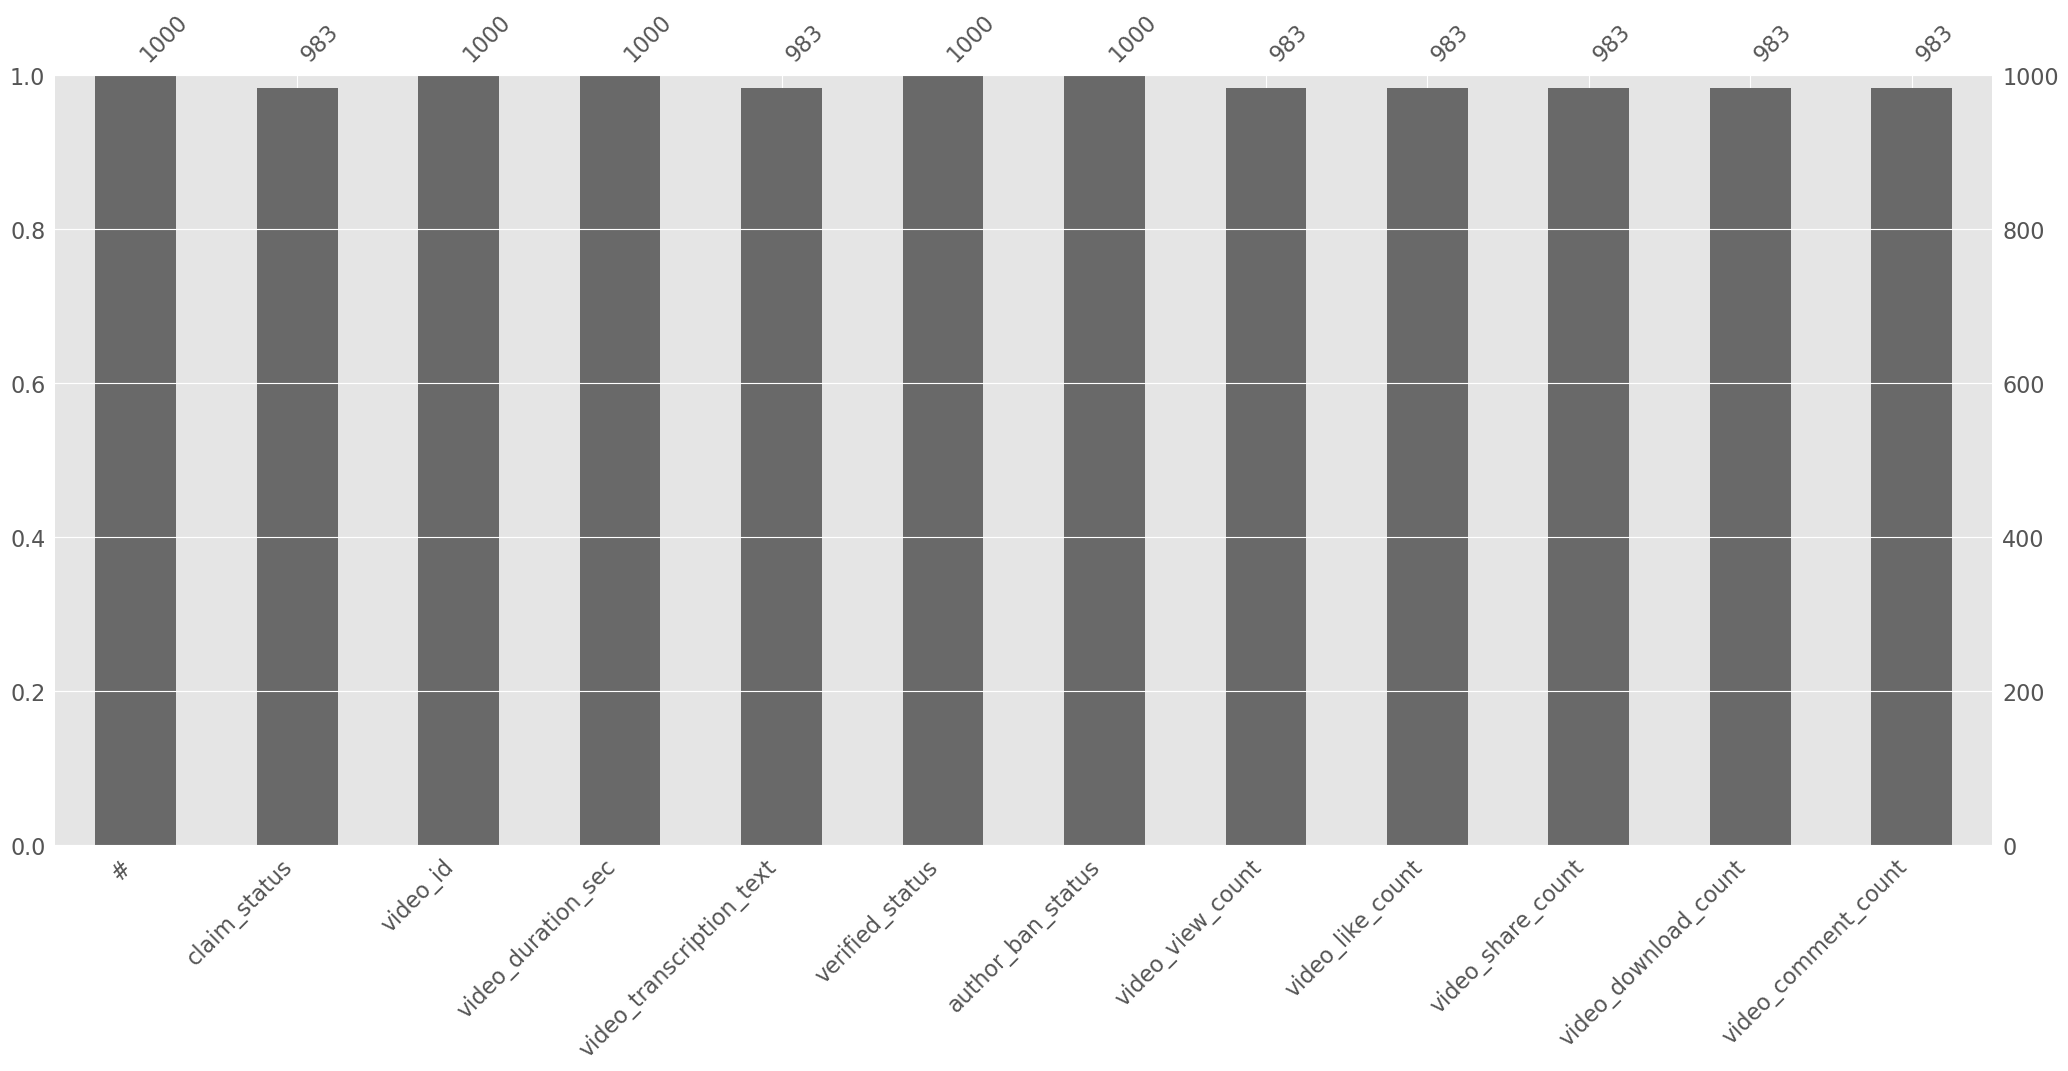

In [8]:
#A visualised form of missing entries in a form of bar


msno.bar(df.sample(1000))

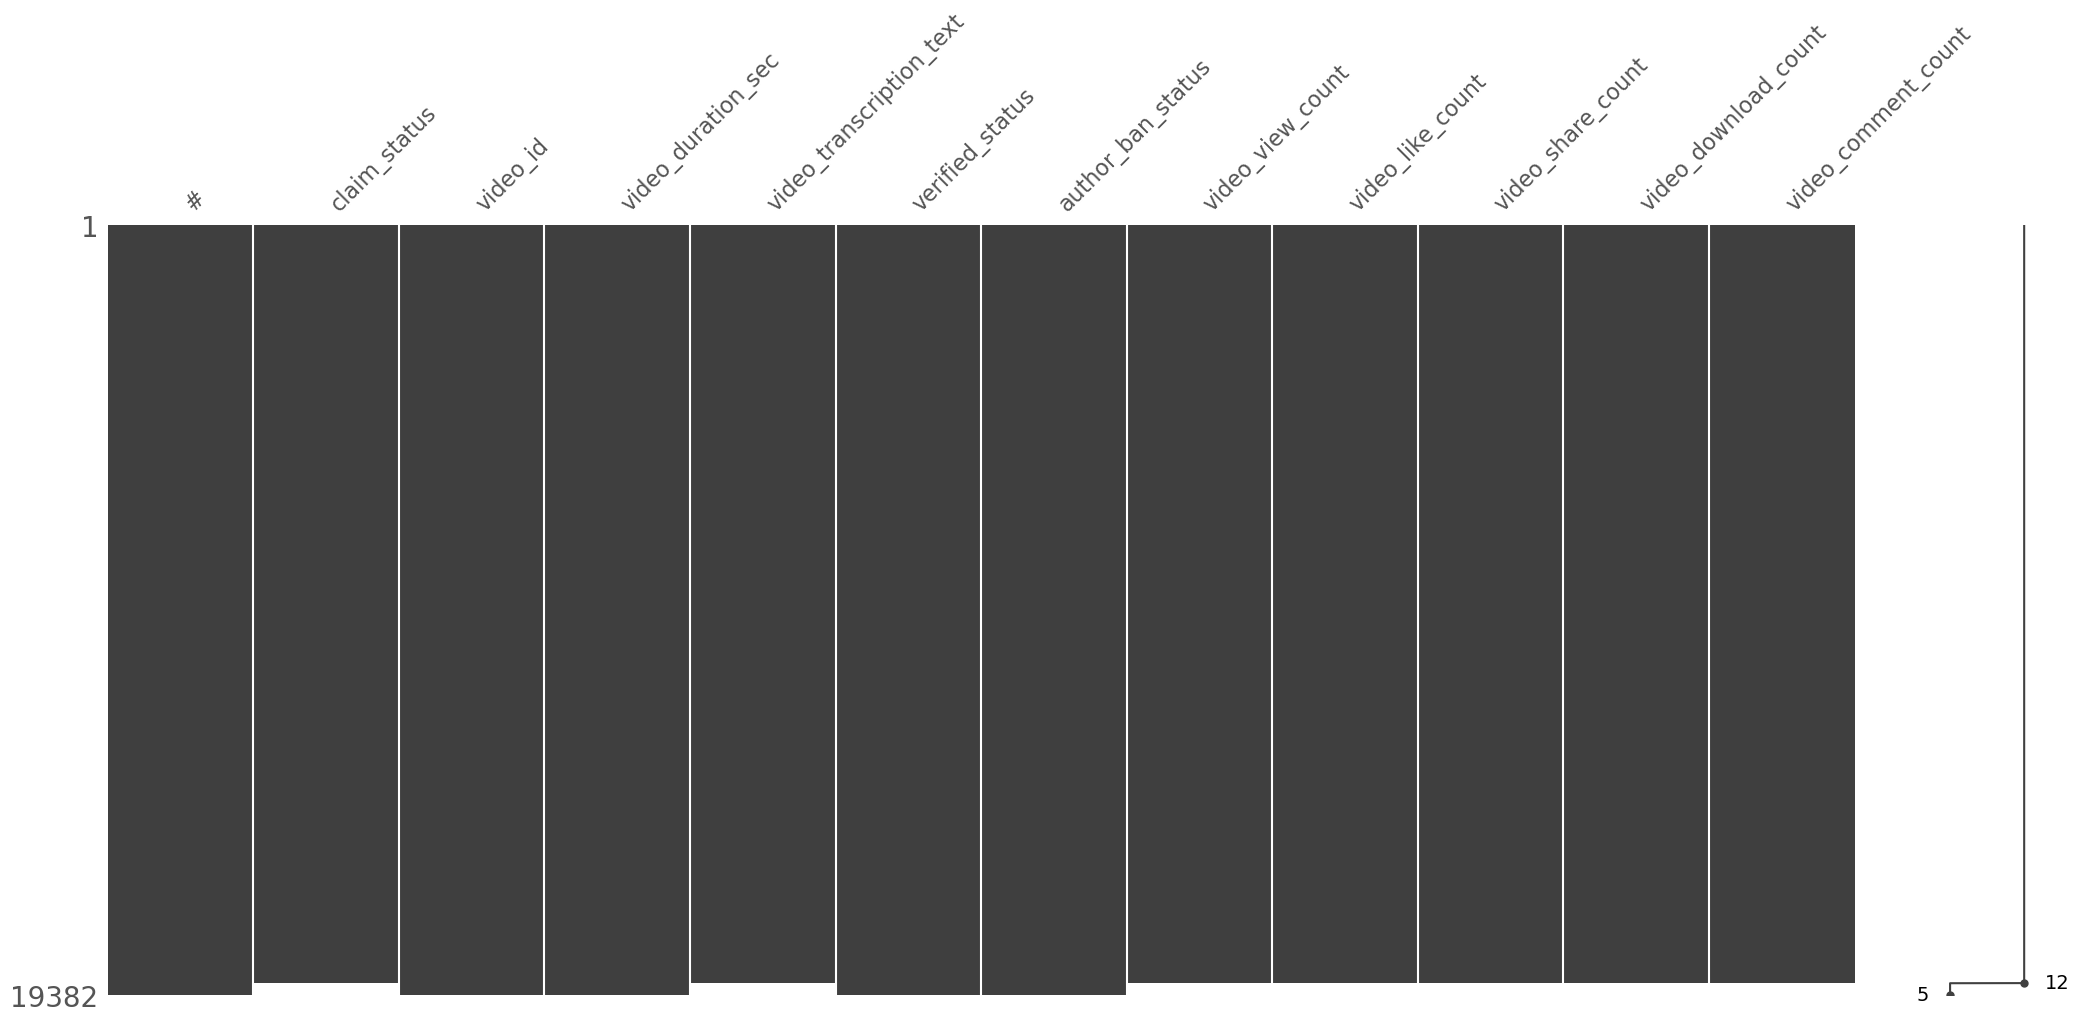

In [9]:
#A visualised table form of missing entries

msno.matrix (df);

In [10]:
# Drop missing datas from "ROWS" tat has NaN

df = df.dropna()

In [11]:
# Check for missing data after removing NaN values
missing_data_after_removal = df.isnull().sum()
pct_missing_after_removal = (missing_data_after_removal / len(df)) * 100

# Display the result
print(pd.DataFrame({'Column': missing_data_after_removal.index, 'Missing Percentage': pct_missing_after_removal}))

                                            Column  Missing Percentage
#                                                #                 0.0
claim_status                          claim_status                 0.0
video_id                                  video_id                 0.0
video_duration_sec              video_duration_sec                 0.0
video_transcription_text  video_transcription_text                 0.0
verified_status                    verified_status                 0.0
author_ban_status                author_ban_status                 0.0
video_view_count                  video_view_count                 0.0
video_like_count                  video_like_count                 0.0
video_share_count                video_share_count                 0.0
video_download_count          video_download_count                 0.0
video_comment_count            video_comment_count                 0.0


In [12]:
# Data Types for our columns

print(df.dtypes)

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object


In [13]:
#Checking how many of them are verified 

verified_count = df['verified_status'].value_counts()['verified']

print("Number of verified entries:", verified_count)

Number of verified entries: 1200


# UNDERSTANDING DATA 

# CLAIMS Vs OPINION

In [28]:
# What are the different values for claim status and how many of each are in the data?

df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [32]:
# What is the average view count of videos with "opinion" status?

opinions = df[df['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


In [30]:
#Next, examine the engagement trends associated with each different claim status.
#Start by using Boolean masking to filter the data according to claim status, then calculate the mean and median view counts for each claim status.

# What is the average view count of videos with "claim" status?

claims = df[df['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())



Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [26]:
# Filter the DataFrame to select rows where video_duration_sec is greater than a certain threshold
lengthy_videos = df[df['video_duration_sec'] > 30]

# Display the video_transcription_text of lengthy videos
print(lengthy_videos['video_transcription_text'])

0        someone shared with me that drone deliveries a...
1        someone shared with me that there are more mic...
2        someone shared with me that american industria...
5        someone shared with me that gross domestic pro...
7        someone shared with me that the best selling s...
                               ...                        
19077    in our opinion the human brain uses 20% of the...
19078    in our opinion applying an equal amount of pre...
19079    in our opinion the earth holds about 11 quinti...
19081    in our opinion the moon is moving away from th...
19083    in our opinion a pineapple plant can only prod...
Name: video_transcription_text, Length: 10201, dtype: object


In [43]:
#Now, examine trends associated with the ban status of the author.
#Use groupby() to calculate how many videos there are for each combination of categories of claim status and author ban status.

grouped_data = df.groupby(['claim_status', 'author_ban_status'])

summary_statistics = grouped_data.agg({
    'video_view_count': ['mean', 'median', 'count'],
    'video_like_count': ['mean', 'median', 'count'],
    'video_comment_count': ['mean', 'median', 'count']
})

#df.groupby(['author_ban_status']).agg(
    #{'video_view_count': ['count', 'mean', 'median'],
     #'video_like_count': ['count', 'mean', 'median'],
     #'video_share_count': ['count', 'mean', 'median']
     #})

# Display the summary statistics
print(summary_statistics)



                               video_view_count                  \
                                           mean    median count   
claim_status author_ban_status                                    
claim        active               499221.733171  499500.5  6566   
             banned               505907.917304  512572.0  1439   
             under review         504054.640674  500774.0  1603   
opinion      active                 4958.120563    4958.0  8817   
             banned                 4876.530612    5083.5   196   
             under review           4958.105832    4884.0   463   

                               video_like_count                  \
                                           mean    median count   
claim_status author_ban_status                                    
claim        active               164960.302924  121943.0  6566   
             banned               173719.102849  132044.0  1439   
             under review         165566.954460  125882.0  16

Exemplar response: A few observations stand out:

Banned authors and those under review get far more views, likes, and shares than active authors.
In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.
Now, create three new columns to help better understand engagement rates:

likes_per_view: represents the number of likes divided by the number of views for each video
comments_per_view: represents the number of comments divided by the number of views for each video
shares_per_view: represents the number of shares divided by the number of views for each video

In [40]:

# Get counts for each group combination of claim status and author ban status
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]


#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

Exemplar response: There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:

Claim videos are more strictly policed than opinion videos
Authors must comply with a stricter set of rules if they post a claim than if they post an opinion
Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while you can use this data to draw conclusions about banned/active authors, you cannot draw conclusions about banned videos. There's no way of determining whether a particular video caused the ban, and banned authors could have posted videos that complied with the terms of service.

Continue investigating engagement levels, now focusing on author_ban_status.

Calculate the median video share count of each author ban status.

In [41]:
# Group data by 'author_ban_status' and calculate the median of 'video_share_count' for each group
median_share_count = df.groupby('author_ban_status')['video_share_count'].median()

# Display the median video share count for each author ban status
print("Median Video Share Count by Author Ban Status:")
print(median_share_count)

Median Video Share Count by Author Ban Status:
author_ban_status
active            437.0
banned          14468.0
under review     9444.0
Name: video_share_count, dtype: float64


Exemplar response: Banned authors have a median share count that's 33 times the median share count of active authors! Explore this in more depth.

Use groupby() to group the data by author_ban_status, then use agg() to get the count, mean, and median of each of the following columns:

video_view_count
video_like_count
video_share_count
Remember, the argument for the agg() function is a dictionary whose keys are columns. The values for each column are a list of the calculations you want to perform.



In [50]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']



#Use groupby() to compile the information in each of the three newly created columns for each combination of 
#categories of claim status and author ban status, then use agg() to calculate the count, the mean, and the median of each group.



df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, when a video does get viewed, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

What percentage of the data is comprised of claims and what percentage is comprised of opinions?
What factors correlate with a video's claim status?
What factors correlate with a video's engagement level?
Exemplar response:

Of the 19,382 samples in this dataset, just under 50% are claims—9,608 of them.
Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

# Number of Video related to fitness 

In [25]:
# Define a list of fitness-related keywords
fitness_keywords = ['fitness', 'exercise', 'workout', 'health', 'wellness', 'gym', 'training']

# Filter the DataFrame to select rows where video_transcription_text contains any of the fitness keywords
fitness_related_videos = df[df['video_transcription_text'].str.contains('|'.join(fitness_keywords), case=False)]

# Count the number of rows in the filtered DataFrame
num_fitness_related_videos = len(fitness_related_videos)

# Display the count
print("Number of videos related to fitness:", num_fitness_related_videos)

Number of videos related to fitness: 65


# Number of Video related to skincare 

In [24]:
# Define a list of fitness-related keywords
skincare_keywords = ['Skincare','Beauty','Dermatology','CosmeticsSkin', 'healthSkincare','routineBeauty', 'regimenSkin','treatmentFacial', 'careHealthy', 'skinClear', 'skinGlowing', 'skinSkin', 'maintenanceBeauty' ,'productsSkincare', 'tips']

# Filter the DataFrame to select rows where video_transcription_text contains any of the fitness keywords
fitness_related_videos = df[df['video_transcription_text'].str.contains('|'.join(skincare_keywords), case=False)]

# Count the number of rows in the filtered DataFrame
num_skincare_related_videos = len(fitness_related_videos)

# Display the count
print("Number of videos related to skincare:", num_skincare_related_videos)

Number of videos related to skincare: 0


# Number of Video related to Food 

In [23]:
# Define a list of fitness-related keywords
food_keywords = ['FoodNutrition','Diet','Healthy', 'eating','Cooking', 'Recipes','Meal', 'prep','Nutrient-rich','Balanced', 'diet','Whole foods','Superfoods','Clean eating','Organic Plant-based', 'Nutritional value']

# Filter the DataFrame to select rows where video_transcription_text contains any of the fitness keywords
food_related_videos = df[df['video_transcription_text'].str.contains('|'.join(food_keywords), case=False)]

# Count the number of rows in the filtered DataFrame
num_food_related_videos = len(food_related_videos)

# Display the count
print("Number of videos related to food:", num_food_related_videos)

Number of videos related to food: 55


# Number of Video related to baby 

In [58]:
# Define a list of love-related keywords
baby_keywords = [ 'infant', 'newborn', 'toddler', 'child', 'baby care', 'parenting', 'baby development', 'baby health', 'baby milestones']

# Filter the DataFrame to select rows where video_transcription_text contains any of the love keywords
baby_related_videos = df[df['video_transcription_text'].str.contains('|'.join(baby_keywords), case=False)]

# Count the number of rows in the filtered DataFrame
num_baby_related_videos = len(baby_related_videos)

# Display the count
print("Number of videos related to baby:", num_baby_related_videos)

Number of videos related to baby: 227


# Number of Video related to love 

In [21]:
# Define a list of love-related keywords
love_keywords = ['heartbreak', 'breakup', 'unrequited love', 'lost love', 'pain', 'betrayal', 'loneliness', 'heartache', 'emotional distress', 'relationship end']

# Filter the DataFrame to select rows where video_transcription_text contains any of the love keywords
love_related_videos = df[df['video_transcription_text'].str.contains('|'.join(love_keywords), case=False)]

# Count the number of rows in the filtered DataFrame
num_love_related_videos = len(love_related_videos)

# Display the count
print("Number of videos related to love:", num_love_related_videos)

Number of videos related to love: 0


In [ ]:
From understanding the data , also by doing furthur analysis it seems that 


there were more number of videos that are made related ,

baby care = 227 video
love = 0
skincare = 0
fitness = 65
food = 55

by deepdiving in depth we can see that videos made 0-20 secs has the maximum view count which hold 5158 number of videos in total , whereas videos made in range of 41-50 sec 
has the maximum like, share , download and comment count.


Overall if tiktokers are indulging thier activity by making nore number of followers if they make videos for 0-20 secs and using fitness and 
baby care content will reach a maxmium reach to the followers 


In [19]:
# Define the bins for video durations
bins = [0, 20, 30, 40, 50, 60, float('inf')]  # Specifies the bin edges

# Define the labels for each bin
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Use the cut function to categorize the video durations into the specified bins
df['duration_category'] = pd.cut(df['video_duration_sec'], bins=bins, labels=labels, right=False)

# Display the count of videos in each duration category
video_duration_counts = df['duration_category'].value_counts().sort_index()
print("Video duration categories:")
print(video_duration_counts)


Video duration categories:
0-20     5158
21-30    3409
31-40    3340
41-50    3423
51-60    3414
61+       340
Name: duration_category, dtype: int64


In [18]:

# Define duration categories
duration_categories = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Remove non-numeric characters from the duration categories
duration_categories = [category.replace('+', '') for category in duration_categories]

# Iterate over each duration category
for category in duration_categories:
    # Split the category range into minimum and maximum values
    min_duration, max_duration = map(int, category.split('-'))
    
    # Filter the DataFrame to select rows in the current duration category
    duration_df = df[df['video_duration_sec'].between(min_duration, max_duration)]
    
    # Find the maximum value of each metric within the current duration category
    max_view_count = duration_df['video_view_count'].max()
    max_like_count = duration_df['video_like_count'].max()
    max_share_count = duration_df['video_share_count'].max()
    max_download_count = duration_df['video_download_count'].max()
    max_comment_count = duration_df['video_comment_count'].max()
    
    # Display the results
    print(f"Duration Category: {category}")
    print(f"Max View Count: {max_view_count}")
    print(f"Max Like Count: {max_like_count}")
    print(f"Max Share Count: {max_share_count}")
    print(f"Max Download Count: {max_download_count}")
    print(f"Max Comment Count: {max_comment_count}")
    print()

Duration Category: 0-20
Max View Count: 999817.0
Max Like Count: 656243.0
Max Share Count: 249672.0
Max Download Count: 14044.0
Max Comment Count: 8674.0

Duration Category: 21-30
Max View Count: 999673.0
Max Like Count: 654588.0
Max Share Count: 241010.0
Max Download Count: 13297.0
Max Comment Count: 7694.0

Duration Category: 31-40
Max View Count: 999127.0
Max Like Count: 636812.0
Max Share Count: 240154.0
Max Download Count: 14308.0
Max Comment Count: 8481.0

Duration Category: 41-50
Max View Count: 998863.0
Max Like Count: 657830.0
Max Share Count: 256130.0
Max Download Count: 14994.0
Max Comment Count: 9599.0

Duration Category: 51-60
Max View Count: 999655.0
Max Like Count: 648101.0
Max Share Count: 209360.0
Max Download Count: 13954.0
Max Comment Count: 7767.0



In [17]:
# Define the duration categories
duration_categories = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Initialize variables to store the category with the highest maximum values for each metric
max_view_count_category = ''
max_like_count_category = ''
max_share_count_category = ''
max_download_count_category = ''
max_comment_count_category = ''

# Initialize variables to store the highest maximum values for each metric
max_view_count = -1
max_like_count = -1
max_share_count = -1
max_download_count = -1
max_comment_count = -1

# Iterate over each duration category
for category in duration_categories:
    # Filter the DataFrame to select rows in the current duration category
    duration_df = df[df['video_duration_sec'].between(int(category.split('-')[0]), int(category.split('-')[1]))]
    
    # Find the maximum value of each metric within the current duration category
    max_view_count_temp = duration_df['video_view_count'].max()
    max_like_count_temp = duration_df['video_like_count'].max()
    max_share_count_temp = duration_df['video_share_count'].max()
    max_download_count_temp = duration_df['video_download_count'].max()
    max_comment_count_temp = duration_df['video_comment_count'].max()
    
    # Update the variables if the maximum value for any metric is higher than the current maximum
    if max_view_count_temp > max_view_count:
        max_view_count = max_view_count_temp
        max_view_count_category = category
        
    if max_like_count_temp > max_like_count:
        max_like_count = max_like_count_temp
        max_like_count_category = category
        
    if max_share_count_temp > max_share_count:
        max_share_count = max_share_count_temp
        max_share_count_category = category
        
    if max_download_count_temp > max_download_count:
        max_download_count = max_download_count_temp
        max_download_count_category = category
        
    if max_comment_count_temp > max_comment_count:
        max_comment_count = max_comment_count_temp
        max_comment_count_category = category

# Print the results
print("Category with highest maximum view count:", max_view_count_category)
print("Category with highest maximum like count:", max_like_count_category)
print("Category with highest maximum share count:", max_share_count_category)
print("Category with highest maximum download count:", max_download_count_category)
print("Category with highest maximum comment count:", max_comment_count_category)


Category with highest maximum view count: 0-20
Category with highest maximum like count: 41-50
Category with highest maximum share count: 41-50
Category with highest maximum download count: 41-50
Category with highest maximum comment count: 41-50


# PANDAS PROFILING

In [51]:
#Creating the Pandas Profile Report to show expansive data description including histograms, Interactions and correlation Heatmap
    
#Importing package
import ydata_profiling as pp
from IPython.display import IFrame
 
# Profile Report
datasetReport = pp.ProfileReport(df)
datasetReport.to_file('df.html')
display(IFrame('df.html', width=1000, height=1000))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# VISUALIZATION

<Axes: >

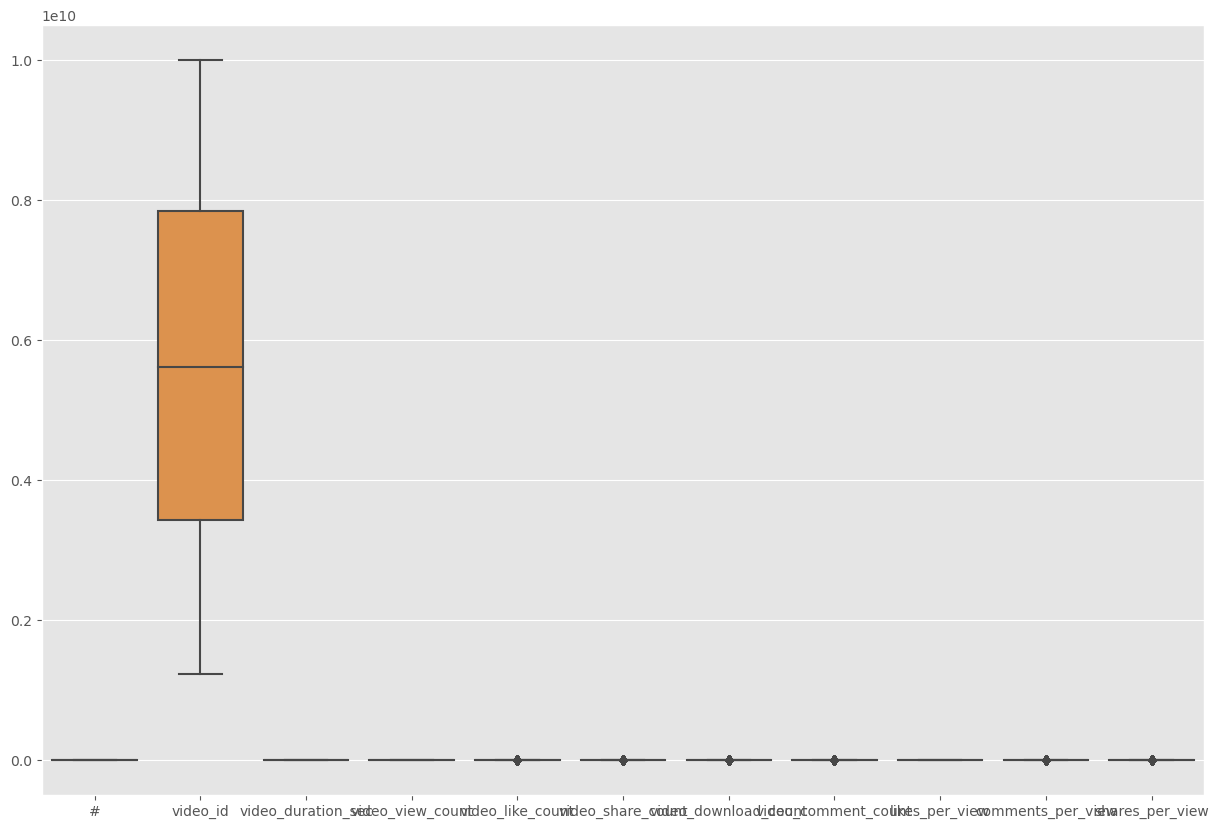

In [52]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

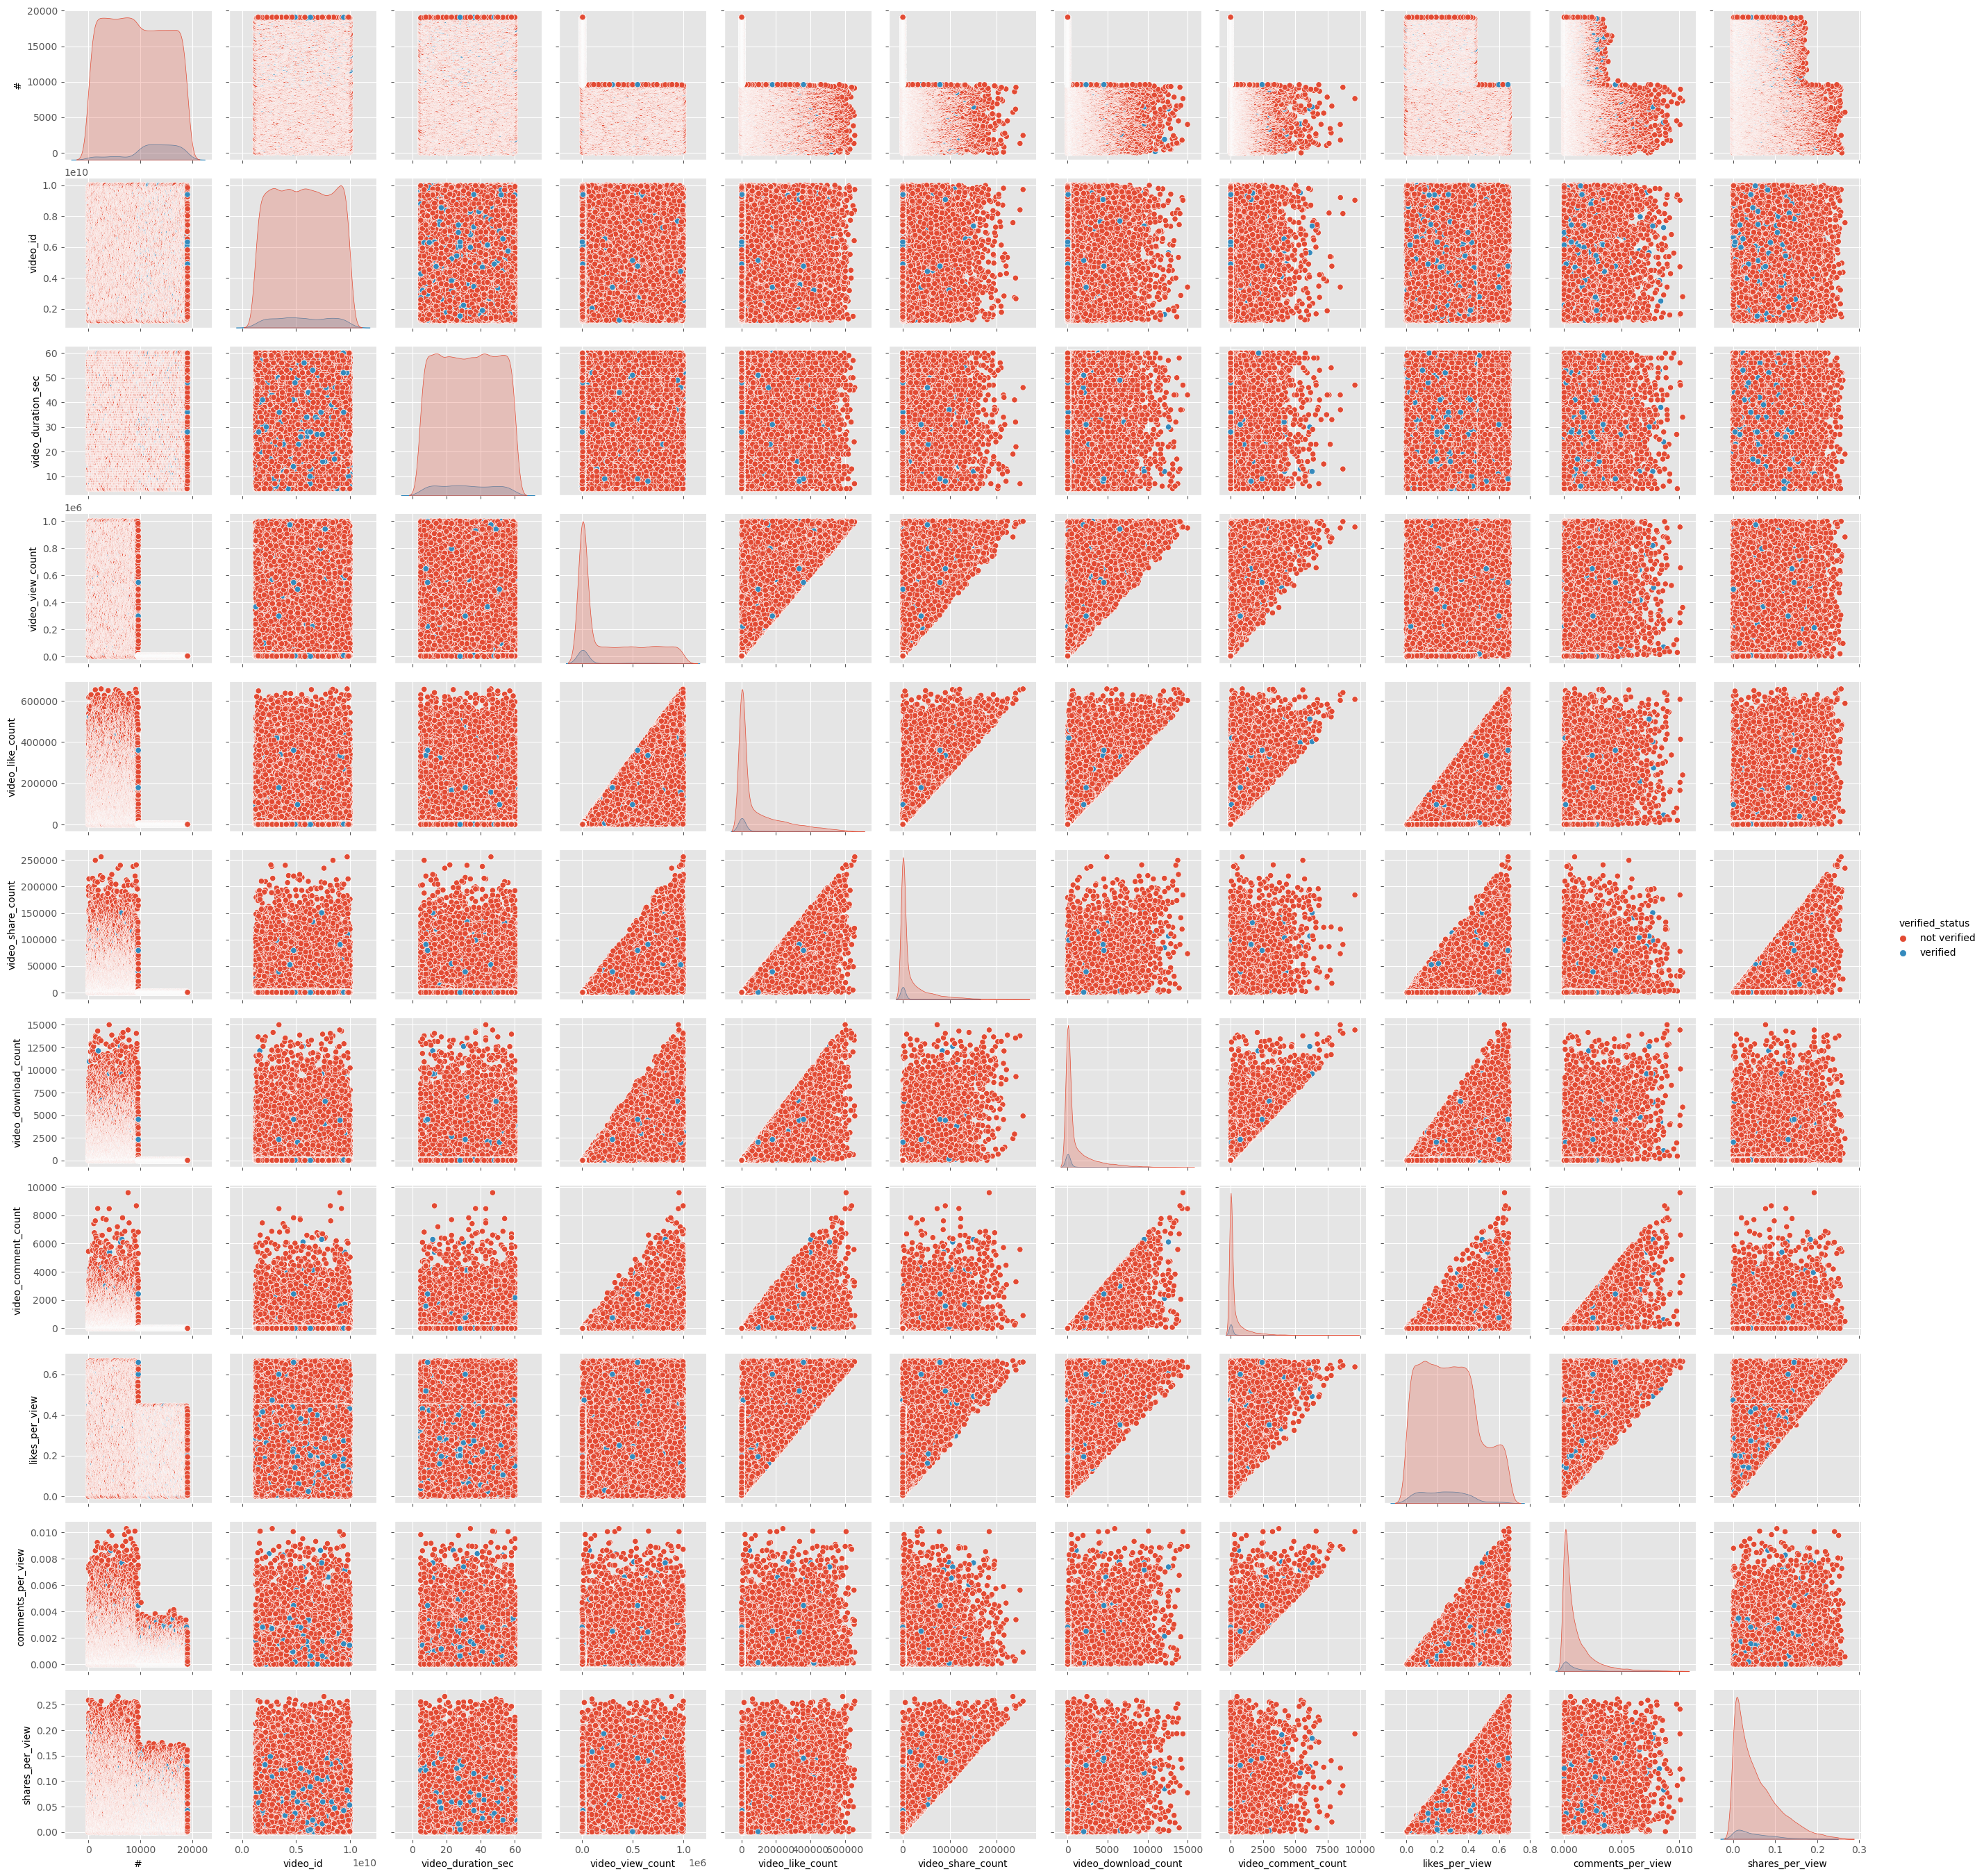

In [53]:
# Pairplot with hue=verified_status
sns.pairplot(df, hue='verified_status')
plt.show()

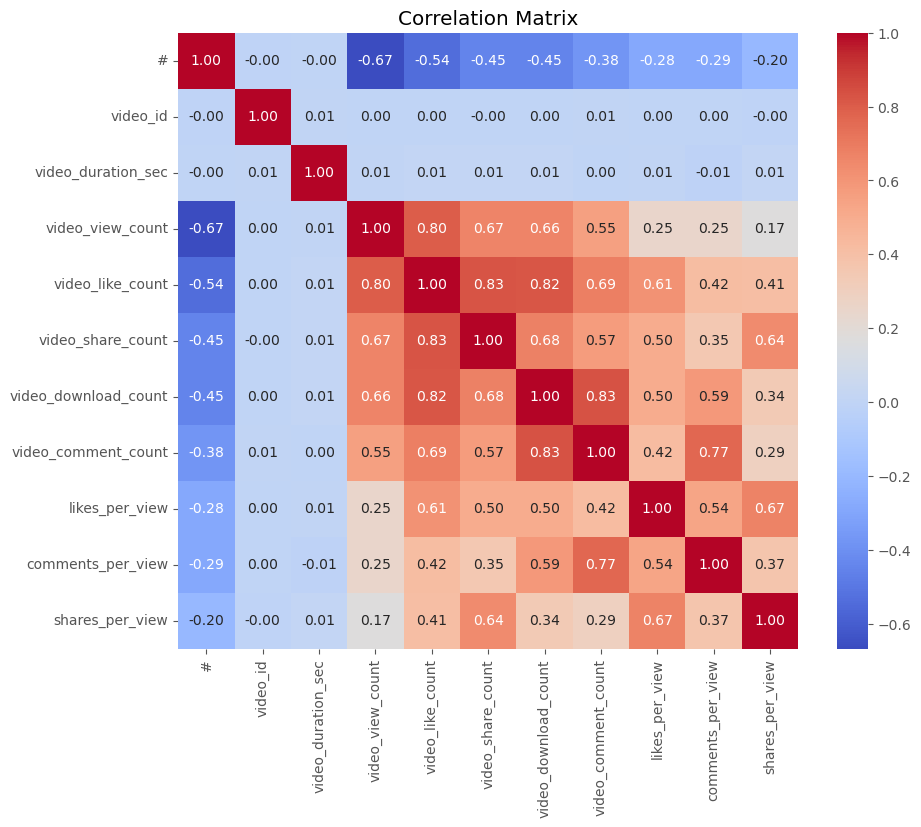

                             #  video_id  video_duration_sec  \
#                     1.000000 -0.003590           -0.000145   
video_id             -0.003590  1.000000            0.008460   
video_duration_sec   -0.000145  0.008460            1.000000   
video_view_count     -0.668047  0.000217            0.008481   
video_like_count     -0.540852  0.000236            0.011567   
video_share_count    -0.451713 -0.002721            0.011560   
video_download_count -0.447729  0.002155            0.013078   
video_comment_count  -0.377445  0.005336            0.000615   
likes_per_view       -0.284968  0.000279            0.008796   
comments_per_view    -0.289032  0.002949           -0.013805   
shares_per_view      -0.199439 -0.004672            0.012661   

                      video_view_count  video_like_count  video_share_count  \
#                            -0.668047         -0.540852          -0.451713   
video_id                      0.000217          0.000236          -0.0027

C:\Users\Owner\AppData\Local\Temp\ipykernel_53900\1670526701.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

As per the correlation matrix we can conclude that 


1.(video_like_count, video_view_count) has a correlation coefficient of approximately 0.804, which indicates a strong positive correlation.

This suggests that as the number of likes increases, the number of views also tends to increase.

2.(video_id, video_share_count) has a correlation coefficient of approximately -0.0027, which indicates a weak negative correlation. 

This suggests that there is little to no relationship between the video ID and the number of shares.

In [54]:
#installing missingo to visually see the missing values in the dataset to get an idea 


!pip install missingno
